# HiHi

## Trees

cateogical variables:
- Pclass
- Sex
- Sibsp 0,1,>=2
- Parch 0,1,2,>=3
- Embarked

quantitative variables:
- Age
- Fare (log transformation)

In [10]:
# load dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('../data/processed/train_processed.csv')

# for var in df.columns:
#     print(df[var].describe())
    
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
quantitative_features = ['Age', 'Log_Fare']
features = categorical_features + quantitative_features
target = 'Survived'

In [11]:
# preprocess data

def preprocess_data(df):
    df = df.copy()
    df['SibSp'] = df['SibSp'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else '>=2'))
    df['Parch'] = df['Parch'].apply(lambda x: '0' if x == 0 else ('1' if x == 1 else ('2' if x==2 else '>=3')))
    drop_col = ['Name', 'Ticket']
    df = df.drop(columns=drop_col)
    return df

df = preprocess_data(df)
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass     Sex   Age SibSp Parch     Fare Embarked  \
0            1         0       3    male  22.0     1     0   7.2500        S   
1            2         1       1  female  38.0     1     0  71.2833        C   
2            3         1       3  female  26.0     0     0   7.9250        S   
3            4         1       1  female  35.0     1     0  53.1000        S   
4            5         0       3    male  35.0     0     0   8.0500        S   

   Log_Fare  
0  1.982380  
1  4.266802  
2  2.071283  
3  3.972365  
4  2.086914  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    ob

In [12]:
# Encode categorical variables (turn into numerical)
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))
    label_encoders[feature] = le
    
for var in categorical_features:
    print(df[var].unique())

[2 0 1]
[1 0]
[1 0 2]
[0 1 2 3]
[2 0 1]


In [4]:
# train test split
X = df[categorical_features + quantitative_features]
y = df[target]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# decision tree



In [ ]:
# random forest

In [ ]:
# gbdt

Validation Accuracy: 0.8041958041958042

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        87
           1       0.78      0.70      0.74        56

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.80       143


Cross-Validation Accuracy: Mean = 0.8025903673790997 Std = 0.039889318122347125

Feature Importance:
     Feature  Importance
1       Sex    0.613274
0    Pclass    0.164484
2     SibSp    0.070213
5       Age    0.048775
4  Embarked    0.039331
6  Log_Fare    0.032966
3     Parch    0.030956


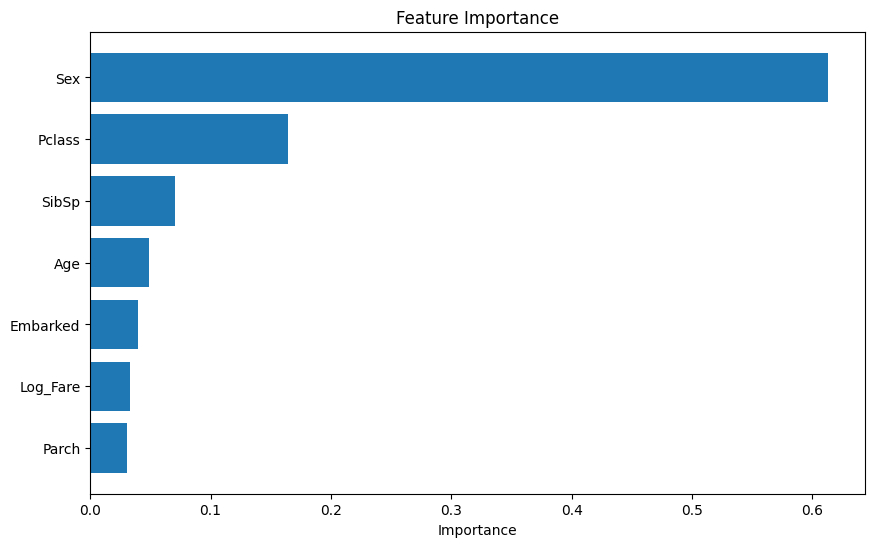

In [16]:
# xgboost dt

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    max_depth=4,          # Limit tree depth to prevent overfitting
    learning_rate=0.1,    # Conservative learning rate
    n_estimators=100      # Number of trees
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy: Mean =", cv_scores.mean(), "Std =", cv_scores.std())

# Feature importance
feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()